<a href="https://colab.research.google.com/github/WGaitanidis/Grp5_Data_Analysis_Visualisation/blob/main/Grp5_Data_Analysis_Sleep_Cognitive_Abilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to the project
Text

## Import the packages needed

Text

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the datasets
CSV Files of the datasets have been uploaded to our Git Repository and are uploaded from there

In [2]:
file_path_U1 = "https://raw.githubusercontent.com/WGaitanidis/Grp5_Data_Analysis_Visualisation/main/Grp5_Data_Tracking_CSV/Grp5_Data_Tracking_evaluation_U1.csv"
file_path_U2 = "https://raw.githubusercontent.com/WGaitanidis/Grp5_Data_Analysis_Visualisation/main/Grp5_Data_Tracking_CSV/Grp5_Data_Tracking_evaluation_U2.csv"
file_path_U3 = "https://raw.githubusercontent.com/WGaitanidis/Grp5_Data_Analysis_Visualisation/main/Grp5_Data_Tracking_CSV/Grp5_Data_Tracking_evaluation_U3.csv"

delimiter = ';'

df_ori_U1 = pd.read_csv(file_path_U1, sep=delimiter, encoding='utf-8')
df_ori_U2 = pd.read_csv(file_path_U2, sep=delimiter, encoding='utf-8')
df_ori_U3 = pd.read_csv(file_path_U3, sep=delimiter, encoding='utf-8')


## Add the growth rates for the brain score and all the other categories


In [3]:
# List of variables to calculate growth rates for
variables = ['peak_brain_level', 'cat_lang', 'cat_prob_solv', 'cat_memory', 'cat_focus', 
             'cat_mental_agility', 'cat_emotion', 'cat_coord']

# List of dataframes
dfs = [df_ori_U1, df_ori_U2, df_ori_U3]

# Iterate over the dataframes
for i, df in enumerate(dfs):
    # Iterate over the variables
    for var in variables:
        # Calculate the growth rate and add it as a new column
        df[f'{var}_growth'] = df[var].pct_change()

    # Update the dataframe in the list
    dfs[i] = df


In [4]:
df_ori_U1.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,...,cat_emotion,cat_coord,peak_brain_level_growth,cat_lang_growth,cat_prob_solv_growth,cat_memory_growth,cat_focus_growth,cat_mental_agility_growth,cat_emotion_growth,cat_coord_growth
0,1,0,Tuesday,NaN,NaN,28.02.2023 23:46,11:46 PM,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Wednesday,01.03.2023 07:23,7:23 AM,01.03.2023 23:23,11:23 PM,07:37:00,457.0,16:00:00,...,325.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,Thursday,02.03.2023 08:39,8:39 AM,03.03.2023 02:51,2:51 AM,09:16:00,556.0,18:12:00,...,512.0,205.0,0.218182,0.056250,0.269841,0.101064,0.163235,0.165217,0.575385,0.366667
3,1,3,Friday,03.03.2023 07:59,7:59 AM,04.03.2023 01:01,1:01 AM,05:08:00,308.0,17:02:00,...,512.0,205.0,0.044776,0.000000,0.093750,0.089372,0.051833,0.067164,0.000000,0.000000
4,1,4,Saturday,04.03.2023 08:01,8:01 AM,04.03.2023 23:27,11:27 PM,07:00:00,420.0,15:26:00,...,548.0,189.0,0.014286,0.242604,0.068571,0.046563,0.000000,-0.008741,0.070312,-0.078049


In [5]:
# Remove the first line of the dataset because it contains Nans that prevent the realization of the multiple regression 

df_ori_U1_1=df_ori_U1.drop(0)

df_ori_U2_2=df_ori_U2.drop(0)

df_ori_U3_3=df_ori_U3.drop(0)

df_ori_U1_1.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,...,cat_emotion,cat_coord,peak_brain_level_growth,cat_lang_growth,cat_prob_solv_growth,cat_memory_growth,cat_focus_growth,cat_mental_agility_growth,cat_emotion_growth,cat_coord_growth
1,1,1,Wednesday,01.03.2023 07:23,7:23 AM,01.03.2023 23:23,11:23 PM,07:37:00,457.0,16:00:00,...,325.0,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2,Thursday,02.03.2023 08:39,8:39 AM,03.03.2023 02:51,2:51 AM,09:16:00,556.0,18:12:00,...,512.0,205.0,0.218182,0.056250,0.269841,0.101064,0.163235,0.165217,0.575385,0.366667
3,1,3,Friday,03.03.2023 07:59,7:59 AM,04.03.2023 01:01,1:01 AM,05:08:00,308.0,17:02:00,...,512.0,205.0,0.044776,0.000000,0.093750,0.089372,0.051833,0.067164,0.000000,0.000000
4,1,4,Saturday,04.03.2023 08:01,8:01 AM,04.03.2023 23:27,11:27 PM,07:00:00,420.0,15:26:00,...,548.0,189.0,0.014286,0.242604,0.068571,0.046563,0.000000,-0.008741,0.070312,-0.078049
5,1,5,Sunday,05.03.2023 07:05,7:05 AM,05.03.2023 23:54,11:54 PM,07:38:00,458.0,16:49:00,...,528.0,213.0,0.006036,-0.095238,-0.029412,0.012712,-0.008413,0.024691,-0.036496,0.126984


##Merging the Dataset
In this code, we define a function add_column that takes a DataFrame, a column name, and a value as inputs. It adds a new column to the DataFrame with the specified name and fills it with the specified value using the assignment operation. The function then returns the updated DataFrame. We call this function for each of your DataFrames, adding the new column as required.

In [7]:
def add_column(df, column_name, value):
    """
    This function adds a new column to a pandas DataFrame with a specified value.
    
    Parameters:
    df (pd.DataFrame): The pandas DataFrame to which to add a new column.
    column_name (str): The name of the new column.
    value: The value to fill the new column.

    Returns:
    pd.DataFrame: The updated DataFrame with the new column.
    """

    # DataFrame[column] = value adds a new column to the DataFrame 
    # and fills it with the specified value.
    df[column_name] = value

    return df

# Adding new columns to each DataFrame
df_ori_U1_1 = add_column(df_ori_U1_1, "is_U1", 1)
df_ori_U2_2 = add_column(df_ori_U2_2, "is_U2", 1)
df_ori_U3_3 = add_column(df_ori_U3_3, "is_U3", 1)

# Display one of the updated DataFrames to check if column was successfully added
df_ori_U2_2.head()

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,...,cat_coord,peak_brain_level_growth,cat_lang_growth,cat_prob_solv_growth,cat_memory_growth,cat_focus_growth,cat_mental_agility_growth,cat_emotion_growth,cat_coord_growth,is_U2
1,1,1,Wednesday,01.03.2023 07:30,7:30 AM,01.03.2023 23:45,11:45 PM,07:30:00,450.0,16:15:00,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1,2,Thursday,02.03.2023 07:50,7:50 AM,02.03.2023 23:55,11:55 PM,08:05:00,485.0,16:05:00,...,186.0,0.286517,0.006494,0.231441,0.138889,0.503311,0.247573,0.528736,0.240000,1
3,1,3,Friday,03.03.2023 07:40,7:40 AM,04.03.2023 00:40,12:40 AM,07:45:00,465.0,17:00:00,...,206.0,0.493450,0.200000,0.212766,0.458537,0.383260,0.571984,0.800752,0.107527,1
4,1,4,Saturday,04.03.2023 09:00,9:00 AM,05.03.2023 01:30,1:30 AM,08:20:00,500.0,16:30:00,...,234.0,-0.011696,0.048387,-0.090643,-0.013378,-0.127389,0.009901,-0.083507,0.135922,1
5,1,5,Sunday,05.03.2023 08:50,8:50 AM,06.03.2023 00:30,12:30 AM,07:20:00,440.0,15:40:00,...,286.0,0.144970,-0.030769,0.045016,0.122034,0.364964,0.129902,0.111617,0.222222,1


In the next step, we define a function merge_dataframes that takes three DataFrames as inputs and merges them vertically using the pd.concat function. The function then returns the merged DataFrame. We call this function with your three DataFrames as arguments and print the resulting DataFrame.

This will concatenate the dataframes based on the index and will result in a dataframe with the same index repeated for each original dataframe. If the index is not important and you want a unique index in the final dataframe, you can reset the index by adding df = df.reset_index(drop=True) before the return statement in the merge_dataframes function.

In [8]:
def merge_dataframes(df1, df2, df3):
    """
    This function merges three pandas DataFrames vertically (along rows).
    
    Parameters:
    df1, df2, df3 (pd.DataFrame): The pandas DataFrames to merge.

    Returns:
    pd.DataFrame: The merged DataFrame.
    """

    # pd.concat([df1, df2, df3]) concatenates the DataFrames along the rows
    df = pd.concat([df1, df2, df3])

    # df.fillna(0) replaces any NaN values in the DataFrame with 0
    df = df.fillna(0)

    return df

# Merging the DataFrames
df = merge_dataframes(df_ori_U1_1, df_ori_U2_2, df_ori_U3_3)

# Display df
df

,Week,Research_Date,Day,wake_up_date,wake_up,went_to_sleep_date,went_to_sleep,sleep_time,sleep_time_in_min,awake_time,...,cat_lang_growth,cat_prob_solv_growth,cat_memory_growth,cat_focus_growth,cat_mental_agility_growth,cat_emotion_growth,cat_coord_growth,is_U1,is_U2,is_U3
1,1,1,Wednesday,01.03.2023 07:23,7:23 AM,01.03.2023 23:23,11:23 PM,07:37:00,457.0,16:00:00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
2,1,2,Thursday,02.03.2023 08:39,8:39 AM,03.03.2023 02:51,2:51 AM,09:16:00,556.0,18:12:00,...,0.056250,0.269841,0.101064,0.163235,0.165217,0.575385,0.366667,1.0,0.0,0.0
3,1,3,Friday,03.03.2023 07:59,7:59 AM,04.03.2023 01:01,1:01 AM,05:08:00,308.0,17:02:00,...,0.000000,0.093750,0.089372,0.051833,0.067164,0.000000,0.000000,1.0,0.0,0.0
4,1,4,Saturday,04.03.2023 08:01,8:01 AM,04.03.2023 23:27,11:27 PM,07:00:00,420.0,15:26:00,...,0.242604,0.068571,0.046563,0.000000,-0.008741,0.070312,-0.078049,1.0,0.0,0.0
5,1,5,Sunday,05.03.2023 07:05,7:05 AM,05.03.2023 23:54,11:54 PM,07:38:00,458.0,16:49:00,...,-0.095238,-0.029412,0.012712,-0.008413,0.024691,-0.036496,0.126984,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,4,26,Sunday,26.03.2023 08:30,8:30 AM,27.03.2023 00:31,12:31 AM,07:21:00,441.0,16:01:00,...,0.139706,-0.030242,0.047038,-0.015038,0.020057,-0.004706,0.001610,0.0,0.0,1.0
27,5,27,Monday,27.03.2023 08:45,8:45 AM,28.03.2023 00:40,12:40 AM,08:14:00,494.0,15:55:00,...,-0.043011,0.016632,-0.013311,-0.030534,0.014045,-0.005910,0.086817,0.0,0.0,1.0
28,5,28,Tuesday,28.03.2023 08:30,8:30 AM,29.03.2023 00:12,12:12 AM,07:50:00,470.0,15:42:00,...,0.132584,-0.040900,0.023609,0.001575,-0.024931,-0.002378,-0.029586,0.0,0.0,1.0
29,5,29,Wednesday,29.03.2023 06:30,6:30 AM,30.03.2023 00:25,12:25 AM,06:18:00,378.0,17:55:00,...,-0.025794,-0.042644,-0.028007,-0.025157,-0.028409,-0.004768,0.021341,0.0,0.0,1.0


# Basic Analysis
* In the first part for the basic analysis, we define a function plot_brain_scores that creates a line plot of 'Research_Date' and 'peak_brain_level' for each user in the DataFrame. 
* The function begins by creating a new figure and axes using the plt.subplots() function from matplotlib. It then creates three separate DataFrames from df, one for each user, by filtering df based on the 'is_U1', 'is_U2', and 'is_U3' columns. 
* For each user, the function then uses the ax.plot() function to create a line plot of 'Research_Date' vs 'peak_brain_level' on the axes. 
* The function adds a legend to the plot using ax.legend(), labels for the x and y axes using ax.set_xlabel() and ax.set_ylabel(), and a title using ax.set_title(). 
* Finally, the function displays the plot using plt.show().

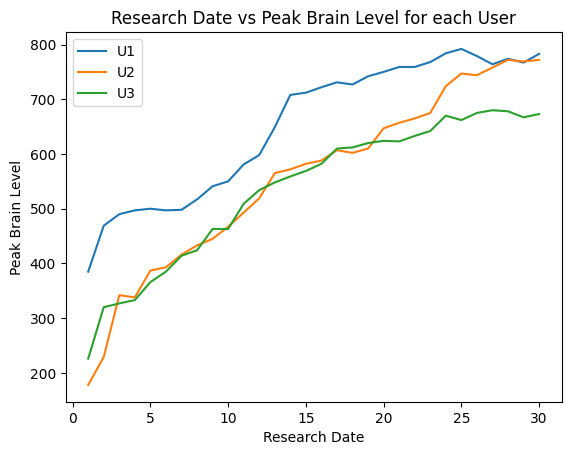

In [ ]:
def plot_brain_scores(df):
    """
    This function creates a line plot of 'Research_Date' vs 'peak_brain_level' 
    for each user in the DataFrame.

    Parameters:
    df (pd.DataFrame): The pandas DataFrame containing the data to plot.

    Returns:
    None
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Plot the data for each user, using a different color for each user
    # The default marker for plot() is a line.

    # Extracting rows for User 1 and plotting
    df_U1 = df[df['is_U1'] == 1]
    ax.plot(df_U1['Research_Date'], df_U1['peak_brain_level'], label='U1')
    
    # Extracting rows for User 2 and plotting
    df_U2 = df[df['is_U2'] == 1]
    ax.plot(df_U2['Research_Date'], df_U2['peak_brain_level'], label='U2')
    
    # Extracting rows for User 3 and plotting
    df_U3 = df[df['is_U3'] == 1]
    ax.plot(df_U3['Research_Date'], df_U3['peak_brain_level'], label='U3')

    # Adding a legend
    ax.legend()

    # Adding labels for the x and y axes
    ax.set_xlabel('Research Date')
    ax.set_ylabel('Peak Brain Level')

    # Adding a title
    ax.set_title('Research Date vs Peak Brain Level for each User')

    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_brain_scores(df)


### Create plots for all the other Peak App Categories
This function makes use of the fact that you can iterate over a list of variable names and create a plot for each one.
* The function starts by defining a list of the specified variables. 
* It then iterates over this list, creating a new plot for each variable. 
* Within each plot, it creates a different line for each user. 
* The plot has the research date on the x-axis and the variable on the y-axis. The plots are displayed one after the other.

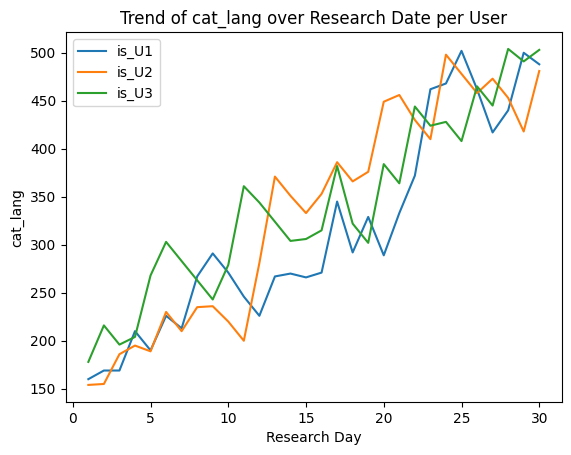

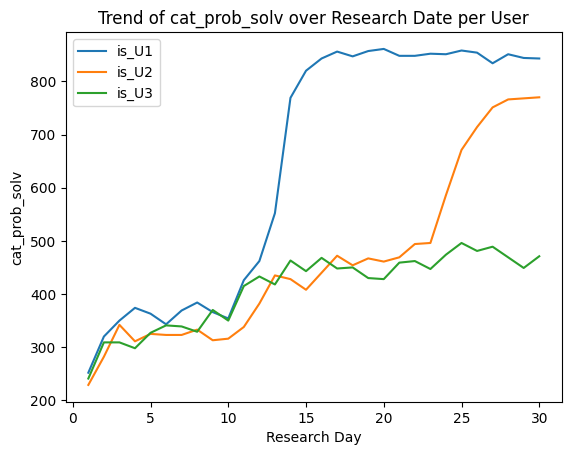

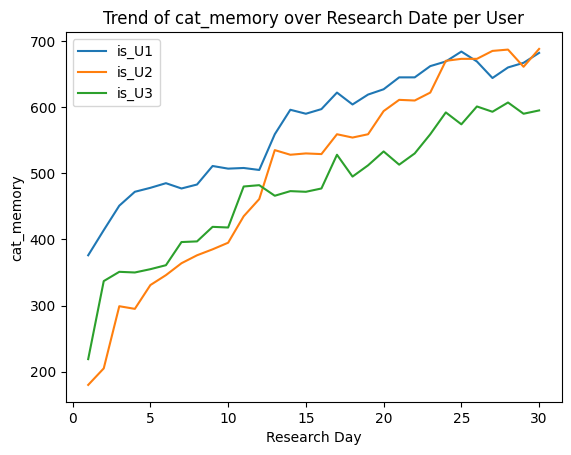

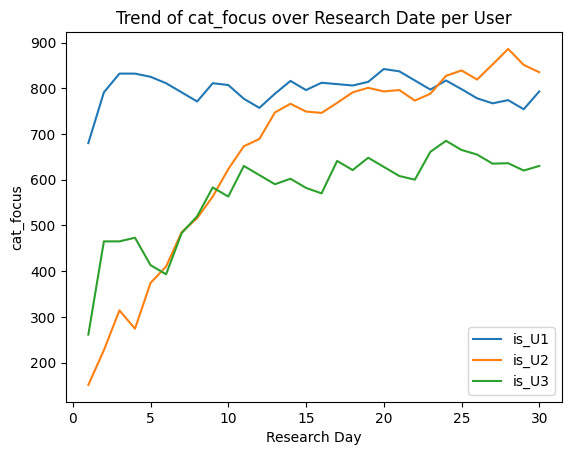

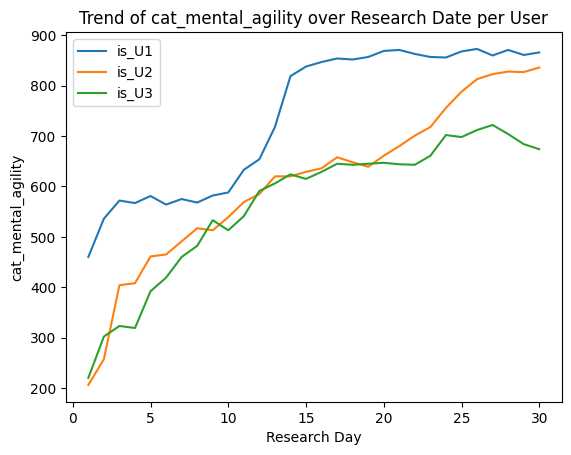

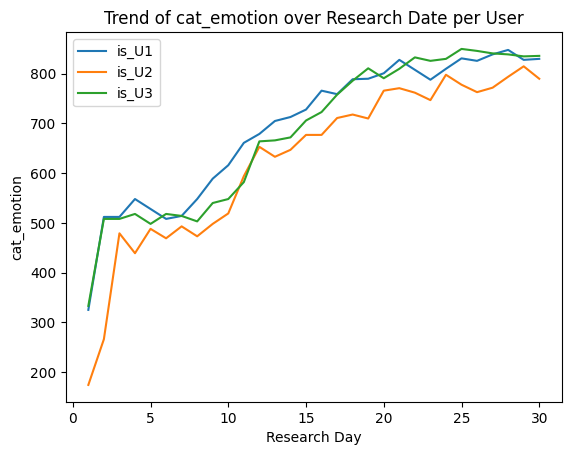

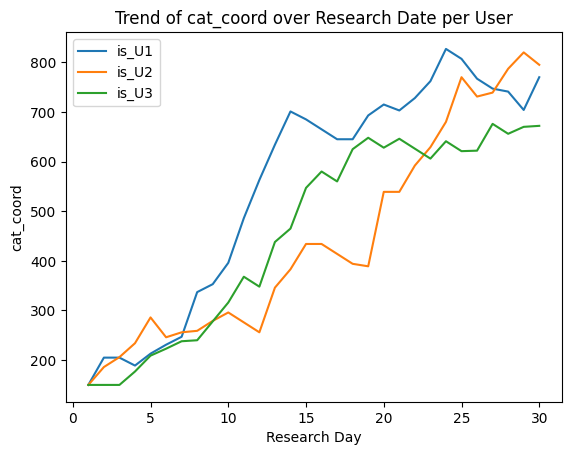

In [ ]:
def create_plots_per_user(df):
    """
    This function creates a separate line plot for each specified variable with the research date on the x-axis 
    and the variable on the y-axis. It creates a different line for each user.
    """
    
    # List of variables to plot
    variables = ['cat_lang', 'cat_prob_solv', 'cat_memory', 'cat_focus', 
                 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    # List of users
    users = ['is_U1', 'is_U2', 'is_U3']

    # Iterate over the variables
    for var in variables:
        # Create a new figure
        plt.figure()

        # Iterate over the users
        for user in users:
            # Create a mask for the current user
            mask = df[user] == 1

            # Create a line plot for the current variable and user
            plt.plot(df.loc[mask, 'Research_Date'], df.loc[mask, var], label=user)

        # Set the title, labels, and legend
        plt.title(f'Trend of {var} over Research Date per User')
        plt.xlabel('Research Day')
        plt.ylabel(var)
        plt.legend()

        # Display the plot
        plt.show()

# Calling the function with the DataFrame
create_plots_per_user(df)


### Growth rates of peak brain level

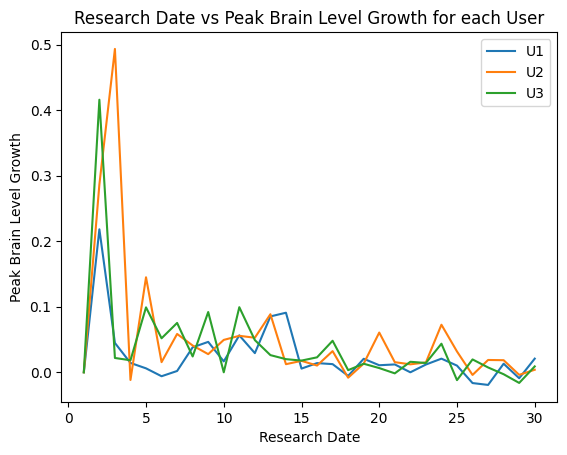

In [ ]:
def plot_brain_scores_growth(df):
    """
    This function creates a line plot of 'Research_Date' vs 'peak_brain_level_growth' 
    for each user in the DataFrame.
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Plot the data for each user, using a different color for each user
    # The default marker for plot() is a line.

    # Extracting rows for User 1 and plotting
    df_U1 = df[df['is_U1'] == 1]
    ax.plot(df_U1['Research_Date'], df_U1['peak_brain_level_growth'], label='U1')
    
    # Extracting rows for User 2 and plotting
    df_U2 = df[df['is_U2'] == 1]
    ax.plot(df_U2['Research_Date'], df_U2['peak_brain_level_growth'], label='U2')
    
    # Extracting rows for User 3 and plotting
    df_U3 = df[df['is_U3'] == 1]
    ax.plot(df_U3['Research_Date'], df_U3['peak_brain_level_growth'], label='U3')

    # Adding a legend
    ax.legend()

    # Adding labels for the x and y axes
    ax.set_xlabel('Research Date')
    ax.set_ylabel('Peak Brain Level Growth')

    # Adding a title
    ax.set_title('Research Date vs Peak Brain Level Growth for each User')

    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_brain_scores_growth(df)

### Growth rates of each category

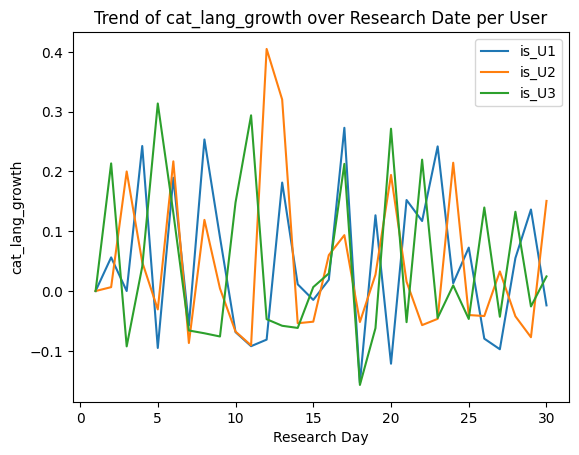

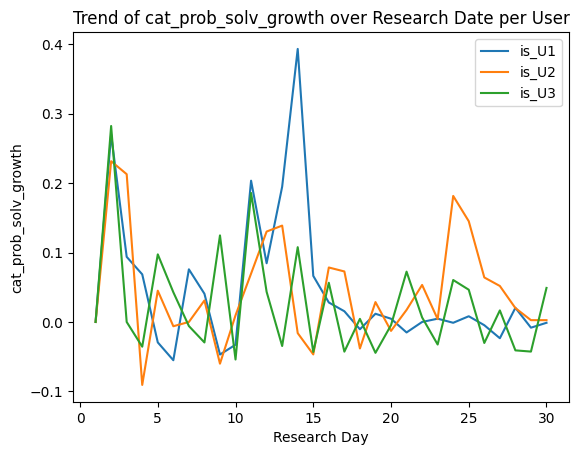

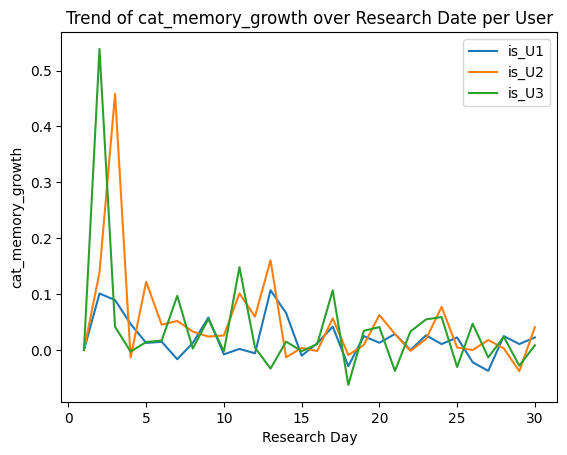

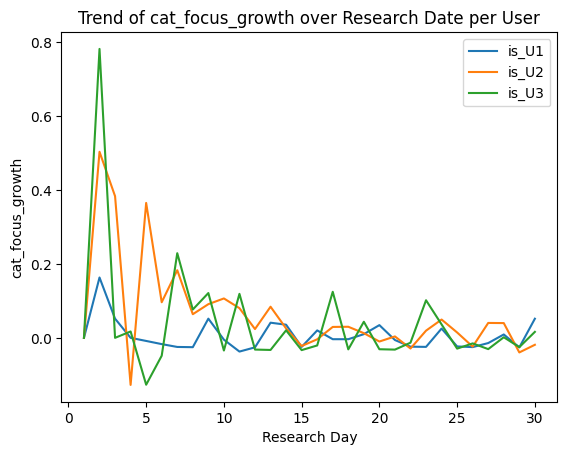

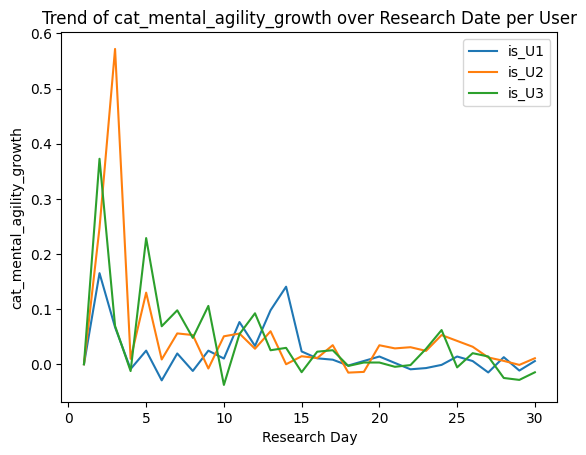

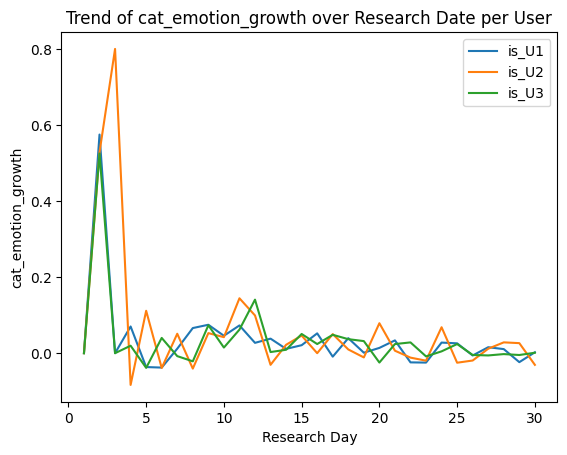

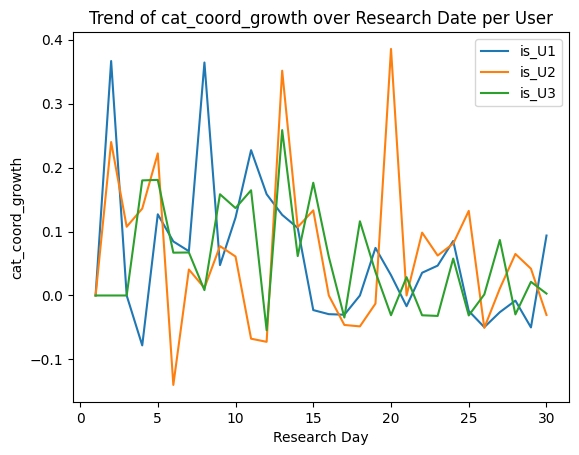

In [ ]:
def create_growth_plots_per_user(df):
    """
    This function creates a separate line plot for each specified variable with the research date on the x-axis 
    and the variable on the y-axis. It creates a different line for each user.
    """
    
    # List of variables to plot
    variables = ['cat_lang_growth', 'cat_prob_solv_growth', 'cat_memory_growth', 'cat_focus_growth', 
                 'cat_mental_agility_growth', 'cat_emotion_growth', 'cat_coord_growth']

    # List of users
    users = ['is_U1', 'is_U2', 'is_U3']

    # Iterate over the variables
    for var in variables:
        # Create a new figure
        plt.figure()

        # Iterate over the users
        for user in users:
            # Create a mask for the current user
            mask = df[user] == 1

            # Create a line plot for the current variable and user
            plt.plot(df.loc[mask, 'Research_Date'], df.loc[mask, var], label=user)

        # Set the title, labels, and legend
        plt.title(f'Trend of {var} over Research Date per User')
        plt.xlabel('Research Day')
        plt.ylabel(var)
        plt.legend()

        # Display the plot
        plt.show()

# Calling the function with the DataFrame
create_growth_plots_per_user(df)

###Variance of sleep time for three users
* The function begins by creating a new figure and axes using the plt.subplots() function from matplotlib.
* It then creates three separate DataFrames from df, one for each user, by filtering df based on the 'is_U1', 'is_U2', and 'is_U3' columns.
* For each user, the function then uses the ax.boxplot() function to create a box plot of 'sleep_time_in_min' on the axes. 
* The function adds a legend to the plot using ax.legend(), labels for the x and y axes using ax.set_xlabel() and ax.set_ylabel(), and a title using ax.set_title(). 
* Finally, the function displays the plot using plt.show().



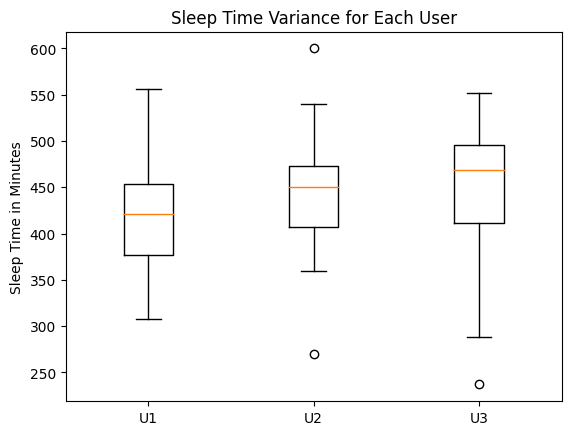

In [ ]:
def plot_sleep_time(df):
    """
    This function creates a box plot of 'sleep_time_in_min' for each user in the DataFrame.
    """

    # Create a figure and an axes.
    fig, ax = plt.subplots()

    # Create a list of sleep times for each user
    sleep_times = [df[df['is_U1'] == 1]['sleep_time_in_min'],
                   df[df['is_U2'] == 1]['sleep_time_in_min'],
                   df[df['is_U3'] == 1]['sleep_time_in_min']]

    # Create a box plot of sleep times
    ax.boxplot(sleep_times)

    # Set the x-tick labels
    ax.set_xticklabels(['U1', 'U2', 'U3'])

    # Set the y-label
    ax.set_ylabel('Sleep Time in Minutes')

    # Set the title
    ax.set_title('Sleep Time Variance for Each User')

    # Show the plot
    plt.show()

# Calling the function with the DataFrame
plot_sleep_time(df)

### Correlation Matrix
* The function starts by creating a subset of the DataFrame containing only the specified columns. It then calculates the correlation matrix using the corr() method of the DataFrame.
* This correlation matrix is passed to seaborn's heatmap function to create a heatmap plot, which is a graphical representation of the correlation matrix where different colors represent different correlation coefficients.
* Finally, the function displays the plot using plt.show().

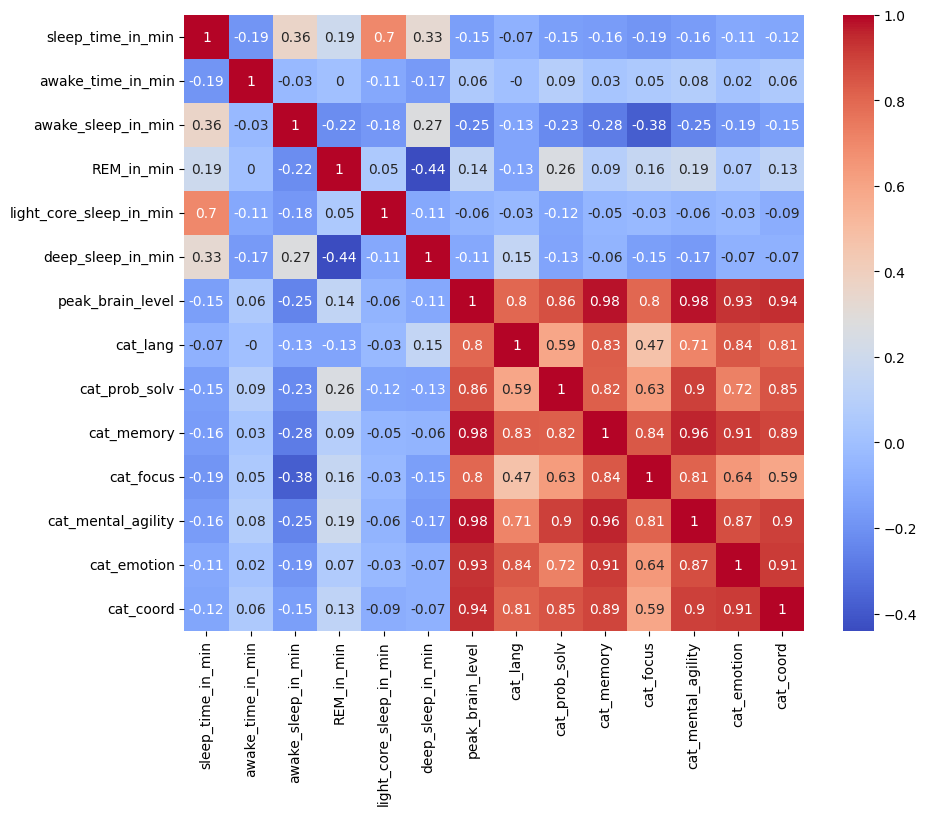

In [ ]:
# Importing necessary library
import seaborn as sns

def plot_corr_matrix(df):
    """
    This function creates a correlation matrix for a set of variables in the DataFrame.
    """
    
    # Selecting the required columns
    selected_columns = ['sleep_time_in_min', 'awake_time_in_min', 'awake_sleep_in_min', 'REM_in_min', 
                        'light_core_sleep_in_min', 'deep_sleep_in_min', 'peak_brain_level', 'cat_lang', 
                        'cat_prob_solv', 'cat_memory', 'cat_focus', 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    df_selected = df[selected_columns]

    # Calculating the correlation matrix
    corr_matrix = df_selected.corr()

    # Creating a larger plot
    plt.figure(figsize=(10, 8))

    # Calculating the correlation matrix and rounding to 2 decimal places
    corr_matrix_rounded = corr_matrix.round(2)

    # Creating a heatmap of the correlation matrix with larger annotation text
    sns.heatmap(corr_matrix_rounded, annot=True, cmap='coolwarm', annot_kws={"size": 10})

    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_corr_matrix(df)


Now, as next step, we want to list the highest correlations:
* The function starts by creating a subset of the DataFrame containing only the specified columns. 
* It then calculates the correlation matrix using the corr() method of the DataFrame.
* This correlation matrix is then "melted" into a long format and sorted by the correlation values.
* The function then returns the top and bottom five correlations.

In [ ]:
def find_extreme_correlations(df):
    """
    This function finds the five pairs of variables with the highest and lowest correlations in the DataFrame.
    """

    # Selecting the required columns
    selected_columns = ['sleep_time_in_min', 'awake_time_in_min', 'awake_sleep_in_min', 'REM_in_min', 
                        'light_core_sleep_in_min', 'deep_sleep_in_min', 'peak_brain_level', 'cat_lang', 
                        'cat_prob_solv', 'cat_memory', 'cat_focus', 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    df_selected = df[selected_columns]

    # Calculating the correlation matrix
    corr_matrix = df_selected.corr()

    # Melting the correlation matrix into a long format
    corr_melted = corr_matrix.where(~np.triu(np.ones(corr_matrix.shape)).astype(bool)).stack().reset_index()

    # Renaming the columns
    corr_melted.columns = ['Variable 1', 'Variable 2', 'Correlation']

    # Sorting by correlation
    corr_sorted = corr_melted.sort_values(by='Correlation', key=abs, ascending=False)

    # Finding the five pairs of variables with the highest correlations
    highest_corr = corr_sorted.head(5)

    # Finding the five pairs of variables with the lowest correlations
    lowest_corr = corr_sorted.tail(5)

    return highest_corr, lowest_corr

# Calling the function with the DataFrame
highest_corr, lowest_corr = find_extreme_correlations(df)

# Print the results
print("Highest correlations:")
print(highest_corr)

print("\nLowest correlations:")
print(lowest_corr)


Highest correlations:
            Variable 1        Variable 2  Correlation
61  cat_mental_agility  peak_brain_level     0.983816
42          cat_memory  peak_brain_level     0.983619
64  cat_mental_agility        cat_memory     0.955457
84           cat_coord  peak_brain_level     0.938360
72         cat_emotion  peak_brain_level     0.930688

Lowest correlations:
     Variable 1               Variable 2  Correlation
25     cat_lang  light_core_sleep_in_min    -0.026029
49    cat_focus  light_core_sleep_in_min    -0.025671
67  cat_emotion        awake_time_in_min     0.024946
4    REM_in_min        awake_time_in_min     0.004223
22     cat_lang        awake_time_in_min    -0.001923


#1. Hypothesis 1 analysis

*Sleep (deep sleep and REM sleep in particular) has a significant impact on cognitive abilities*



# 1.1. OLR - Optimal Linear Regression Hypothesis 1
Choose the most relevant user to do the linear regression that illustrate the expected results

In [ ]:
# Display the multiple linear regression for User 1 with Y= peak_brain_level as dependent variable and X=sleep_time_in_min,REM_in_min, and deep_sleep_in_min as independent variables

import statsmodels.api as sm

X = df['sleep_time_in_min']
y = df['peak_brain_level_growth']

X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     peak_brain_level_growth   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                 -0.010
Method:                      Least Squares   F-statistic:                   0.09404
Date:                     Thu, 11 May 2023   Prob (F-statistic):              0.760
Time:                             10:10:10   Log-Likelihood:                 102.57
No. Observations:                       90   AIC:                            -201.1
Df Residuals:                           88   BIC:                            -196.1
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0562      0.055      1.017      0.312      -0.054       0.166
sleep_time_in_min -3.843e-05      0.000     -0.307      0.760      -0.000       0.000
==============================================================================
Omnibus:                      105.982   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1402.824
Skew:                           3.967   Prob(JB):                    2.40e-305
Kurtosis:                      20.639   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Finding**

Slope: there is a slight negative correlation here between the dependent variable 'peak brain score' and the independent variable 'sleep_time_in_min'. 

At first sight, it does not seem that sleep has a significant impact on cognitive abilities in our experience

Analyze deeper the t and p value

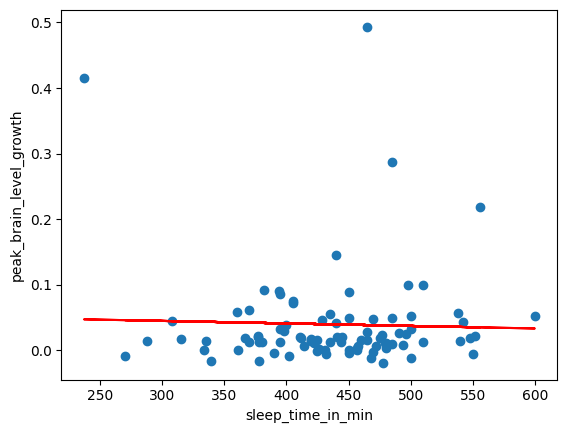

In [ ]:
# Display the visual representation of the regression with the brain score as the dependent variable and the sleeping time as the independent variable

X = df['sleep_time_in_min']
Y = df['peak_brain_level_growth']

slope, intercept = np.polyfit(X, Y, 1)

Y_pred = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('sleep_time_in_min')
plt.ylabel('peak_brain_level_growth')
plt.show()

# 1.2. MLR - Multiple Linear Regression Hypothesis 1


Choose the most relevant user to do the linear regression that illustrate the expected results

In [ ]:
# Display the multiple linear regression for User 1 with Y= peak_brain_level as dependent variable and X=sleep_time_in_min,REM_in_min, and deep_sleep_in_min as independent variables

X = df_ori_U1_1[['sleep_time_in_min','REM_in_min','deep_sleep_in_min']]
Y = df_ori_U1_1['peak_brain_level']

X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

ValueError: ignored

**Findings**



# Further Analysis
Text

# 2. Hypothesis 2

*Continuous training will have a significant impact on performance in several areas of cognitive abilities*




Merge the three individual csv files into one csv file to compare the score of cognitive abilities and conclude about our second Hypothesis 

In [ ]:
file_merged = "Merged_dataset.csv"

delimiter = ';'

df_merged = pd.read_csv(file_merged, sep=delimiter, encoding='utf-8')
df_merged

In [ ]:
# Display the multiple linear regression for User 1 with Y= peak_brain_level as dependent variable and X=sleep_time_in_min,REM_in_min, and deep_sleep_in_min as independent variables

import statsmodels.api as sm

X = df['Research_Date']
y = df['peak_brain_level_growth']

X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

In [ ]:
X = df['Research_Date']
Y = df['peak_brain_level_growth']

slope, intercept = np.polyfit(X, Y, 1)

Y_pred = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Research Date')
plt.ylabel('peak_brain_level_growth')
plt.show()

In [ ]:
X = df['Research_Date']
Y = df['peak_brain_level']

slope, intercept = np.polyfit(X, Y, 1)

Y_pred = slope * X + intercept

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Research Date')
plt.ylabel('peak_brain_level')
plt.show()

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# define the form of the function you want to fit
def func(x, a, b):
  return a * np.cbrt(x) + b

# given data
x_data = df['Research_Date']
y_data = df['peak_brain_level']

# use curve_fit to find the best fit parameters
popt, pcov = curve_fit(func, x_data, y_data)

# popt contains the optimal values for a and b
print("a = ", popt[0])
print("b = ", popt[1])

# to evaluate the regression function at a point x (for example, x = 3), you can use:
y = func(3, *popt)
print("y = ", y)

In [ ]:
# generate x values for the fitted function
x_fit = np.linspace(min(x_data), max(x_data), 30)

# calculate corresponding y values
y_fit = func(x_fit, *popt)

# create a figure and axis
fig, ax = plt.subplots()

# plot the original data as scatter plot
ax.scatter(x_data, y_data, label='data')

# plot the fitted function
ax.plot(x_fit, y_fit, 'r', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

# add a legend
ax.legend()

# show the plot
plt.show()

In [ ]:
import statsmodels.api as sm

X = df['Research_Date']
y = df['peak_brain_level']

X=sm.add_constant(X)
model= sm.OLS(y,X).fit()
model.summary()

# Visualisation

In [ ]:
# Graph that compares the brain score of the users over the experiment

selected_columns = ['A_peak_brain_level', 'W_peak_brain_level', 'L_peak_brain_level']
filtered_df = df_merged[selected_columns]

# Display the filtered DataFrame
filtered_df



In [ ]:
# Extract the x-axis data (Day) and the y-axis data (brain scores)

column1 = filtered_df ['A_peak_brain_level']
column2 = filtered_df ['W_peak_brain_level']
column3 = filtered_df ['L_peak_brain_level']

# Create the line plot
plt.plot(column1, label='User 1')
plt.plot(column2, label='User 2')
plt.plot(column3, label='User 3')

# Add labels, title, and legend
plt.xlabel('Day')
plt.ylabel('Brain Score')
plt.title('Brain Score Progress Over 1 month')
plt.legend()


**Observation**

The level of the brain score increases in a fairly linear way during most of the experiment. The more the user trains, the more the score increases. However, it seems that from day 24 onwards, players reach a certain plateau of progression. At least two players' scores start to stagnate. The level of the last player continues to increase but only slightly. It is expected that he will also start to stagnate. 

**Finding**

In the short term, H2 can be preliminary confirmed. Training increases our level of cognitive ability. 

Nevertheless, it seems that at a certain level, players reach their maximum level of cognitive ability despite continuous training. The progression slows down and stabilizes. 


# Dispersion

In [ ]:
# Other Visualisation tools to provide the distribution of some of our game category scores (mean, IQR) to show that there may be differences between players due to natural predisposition

plt.boxplot(filtered_df)

plt.xticks([1, 2, 3], ['User 1', 'User 2', 'User 3'])

# Add a title
plt.title('Brain Score Level Boxplot')

# Display the graph
plt.show()



**Observation**

Although the progress curve of the players is roughly the same, the range of their progress is quite different. 
This can be explained mainly by different natural predispositions between players in the way they approach this experience. Some players have done very well from the beginning, being efficient from the start, while others have more room for improvement throughout the experience. 

# Correlation between Game Categories

In [ ]:
# Simple correlation between game categories ? to see if some skills are related. 
# Let's take only one dataset of a player rather than going for the three different ones

df_ori_U2_2_2=df_ori_U2_2[['cat_lang','cat_prob_solv','cat_memory','cat_focus','cat_mental_agility','cat_emotion','cat_coord']]
df_ori_U2_2_2


In [ ]:
#Display a correlation matrix of all quantitative variables in df_ori_U2_2_2 by using the function corr. 
corr_U2=df_ori_U2_2_2.corr()
corr_U2

In [ ]:
# import seaborn the tool that enables to creat heatmap
import seaborn as sns

In [ ]:
# Display the correlation matrix of df_ori_U2_2_2 with seaborn heatmap by using the function sns.heatmap
# Using the function annot=True to see the correlation number between the variables
# Using the function cmap='coolwarm' to see more easily the correlation between the variables 
plt.figure(figsize=(20,10))
sns.heatmap(corr_U2, annot=True, cmap='coolwarm',vmin=-1, vmax=1) 
plt.show()

**Finding**

Obviously, the different categories of games are highly correlated with each other as the score of each category increased every day. Nevertheless, we wanted to know if there were more important correlations between some categories, i.e. if some cognitive skills were common. In this case, the player's performance would be closer between these two categories. 

Interpretation for user 2

The correlation coefficient between the cognitive abilities of emotion and coordination, as well as problem solving and mental agility is the highest (0.97). We could conclude that these different categories use common skills and competences as they progress at the same pace. 

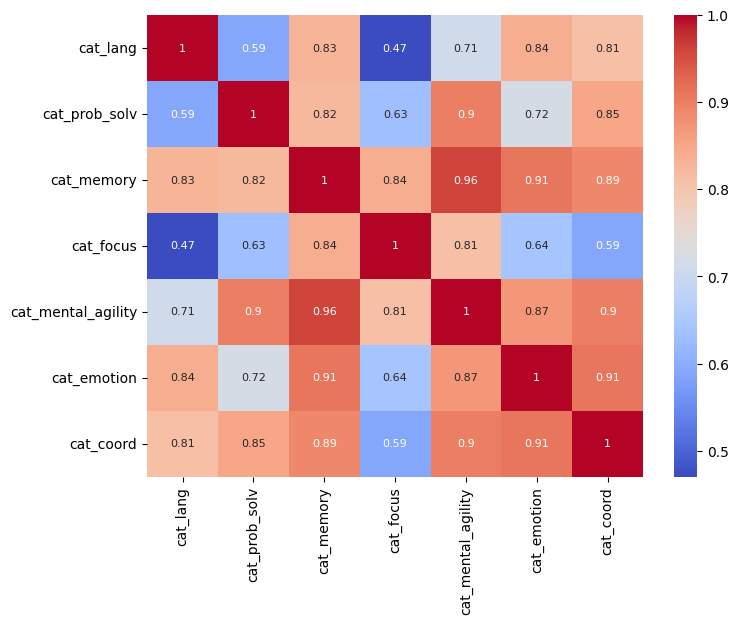

In [ ]:
# Importing necessary library
import seaborn as sns

def plot_corr_matrix(df):
    """
    This function creates a correlation matrix for a set of variables in the DataFrame.
    """
    
    # Selecting the required columns
    selected_columns = ['cat_lang', 
                        'cat_prob_solv', 'cat_memory', 'cat_focus', 'cat_mental_agility', 'cat_emotion', 'cat_coord']

    df_selected = df[selected_columns]

    # Calculating the correlation matrix
    corr_matrix = df_selected.corr()

    # Creating a larger plot
    plt.figure(figsize=(8, 6))

    # Calculating the correlation matrix and rounding to 2 decimal places
    corr_matrix_rounded = corr_matrix.round(2)

    # Creating a heatmap of the correlation matrix with larger annotation text
    sns.heatmap(corr_matrix_rounded, annot=True, cmap='coolwarm', annot_kws={"size": 8})

    # Displaying the plot
    plt.show()

# Calling the function with the DataFrame
plot_corr_matrix(df)